# Ablations for experiments

In this notebook, we conduct the ablation studies for the following experiments:
- **P1**: Second autocorrelation inequality (AlphaEvolve's B2) 
- **P2**: Minimizing the ratio of maximum to minimum distance (AlphaEvolve's B8) 
- **P3**: Packing circles inside a unit square to maximize sum of radii (AlphaEvolve's B12) 
- **P4**: Packing circles inside a rectangle of perimeter 4 to maximize sum of radii (AlphaEvolve's B13)  

In [1]:
import sys

sys.path.insert(0, "../")

import os

import pandas as pd

from data_analysis_utils.processing_utils import process_experiments
from data_analysis_utils.plotting_utils import plot_experiments_statistical_summary

## Loading and processing experiments

In [2]:
model_names = ["GOOGLE_GEMINI-2.5-FLASH", "GOOGLE_GEMINI-2.5-PRO"]
model2cost = {
    "GOOGLE_GEMINI-2.5-FLASH": {"prompt_pm": 0.3, "compl_pm": 2.5},
    "GOOGLE_GEMINI-2.5-PRO": {"prompt_pm": 2.5, "compl_pm": 12.5},
}

args_list = [
    {
        "inpt_dir": "../benchmarks/second_autocorr_ineq/",
        "out_dirs": [
            "gemini_no_evolve/",
            "gemini_no_mp_or_insp/",
            "gemini_mp/",
            "gemini_insp/",
            "gemini_mp_insp/",
        ],
        "sol_func_name": "run",
    },
    {
        "inpt_dir": "../benchmarks/minimizing_max_min_dist/2/",
        "out_dirs": [
            "gemini_mp/",
            "gemini_mp2/",
            "gemini_mp_insp/",
            "gemini_mp_insp_nocontext/",
            "gemini_rank/",
            "gemini_no_evolve/",
            "gemini_insp/",
        ],
        "sol_func_name": "min_max_dist_dim2_16",
    },
    {
        "inpt_dir": "../benchmarks/minimizing_max_min_dist/3/",
        "out_dirs": ["gemini_mp_insp/", "gemini_mp_insp_nocontext/"],
        "sol_func_name": "min_max_dist_dim3_14",
    },
    {
        "inpt_dir": "../benchmarks/circle_packing_square/26/",
        "out_dirs": [
            "gemini_no_evolve/",
            "gemini_no_mp_or_insp/",
            "gemini_mp/",
            "gemini_insp/",
            "gemini_mp_insp/",
        ],
        "sol_func_name": "circle_packing26",
    },
    {
        "inpt_dir": "../benchmarks/circle_packing_square/32/",
        "out_dirs": [
            "gemini_no_evolve/",
            "gemini_no_mp_or_insp/",
            "gemini_mp/",
            "gemini_insp/",
            "gemini_mp_insp/",
        ],
        "sol_func_name": "circle_packing32",
    },
    {
        "inpt_dir": "../benchmarks/circle_packing_rect/",
        "out_dirs": [
            "gemini_mp_insp/",
            "gemini_mp_insp_nocontext/"
        ],
        "sol_func_name": "circle_packing21",
    },
]
inpt_dir2index = {args_list[i]["inpt_dir"]: i for i in range(len(args_list))}

overview_df_rows = []
all_exp = {}

for args in args_list:
    experiments_res = process_experiments(args, model_names, model2cost)
    all_exp[args["inpt_dir"]] = experiments_res

    for exp in experiments_res.keys():
        best_isl = experiments_res[exp]["df"]["best_fitness"].idxmax()
        overview_df_rows.append(
            [
                f"{args['inpt_dir']}{exp}",
                experiments_res[exp]["df"]["best_fitness"].iloc[best_isl],
                experiments_res[exp]["df"]["epoch_best_found"].iloc[best_isl],
                experiments_res[exp]["df"]["num_epochs"].iloc[best_isl],
                experiments_res[exp]["cost"],
            ]
        )

overview_df = pd.DataFrame(
    overview_df_rows,
    columns=["exp_name", "best_fitness", "epoch_best_found", "num_epochs", "est_cost"],
)

overview_df

,exp_name,best_fitness,epoch_best_found,num_epochs,est_cost
0,../benchmarks/second_autocorr_ineq/gemini_no_e...,1.028239,61.0,100,29.591251
1,../benchmarks/second_autocorr_ineq/gemini_no_m...,1.032955,97.0,100,26.839272
2,../benchmarks/second_autocorr_ineq/gemini_mp/,1.046198,98.0,100,29.618523
3,../benchmarks/second_autocorr_ineq/gemini_insp/,1.014383,98.0,100,26.427412
4,../benchmarks/second_autocorr_ineq/gemini_mp_i...,1.040500,98.0,100,32.086688
5,../benchmarks/minimizing_max_min_dist/2/gemini...,1.000003,179.0,200,48.207623
6,../benchmarks/minimizing_max_min_dist/2/gemini...,0.999983,179.0,200,46.692348
7,../benchmarks/minimizing_max_min_dist/2/gemini...,1.000003,191.0,200,68.678250
8,../benchmarks/minimizing_max_min_dist/2/gemini...,1.000003,199.0,200,54.832973
9,../benchmarks/minimizing_max_min_dist/2/gemini...,0.999307,191.0,200,67.914832


## Ablations

In [3]:
os.makedirs("figs/", exist_ok=True)

### P1

In [4]:
args = args_list[inpt_dir2index["../benchmarks/second_autocorr_ineq/"]]
print(args)

experiments_res = all_exp[args["inpt_dir"]]

{'inpt_dir': '../benchmarks/second_autocorr_ineq/', 'out_dirs': ['gemini_no_evolve/', 'gemini_no_mp_or_insp/', 'gemini_mp/', 'gemini_insp/', 'gemini_mp_insp/'], 'sol_func_name': 'run'}


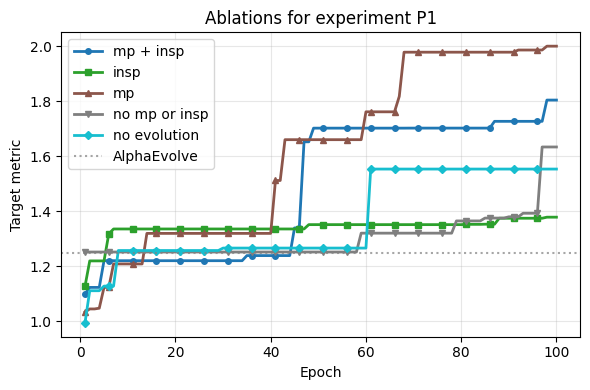

In [5]:
plot_experiments_statistical_summary(
    {
        "mp + insp": experiments_res["gemini_mp_insp/"]["res"],
        "insp": experiments_res["gemini_insp/"]["res"],
        "mp": experiments_res["gemini_mp/"]["res"],
        "no mp or insp": experiments_res["gemini_no_mp_or_insp/"]["res"],
        "no evolution": experiments_res["gemini_no_evolve/"]["res"],
    },
    epsilon=1e-2,
    title="Ablations for experiment P1",
    save_path="figs/P1_ablations.pdf",
)

### P2

#### P2.A (n = 16, d = 2)

In [6]:
args = args_list[inpt_dir2index["../benchmarks/minimizing_max_min_dist/2/"]]
print(args)

experiments_res = all_exp[args["inpt_dir"]]

{'inpt_dir': '../benchmarks/minimizing_max_min_dist/2/', 'out_dirs': ['gemini_mp/', 'gemini_mp2/', 'gemini_mp_insp/', 'gemini_mp_insp_nocontext/', 'gemini_rank/', 'gemini_no_evolve/', 'gemini_insp/'], 'sol_func_name': 'min_max_dist_dim2_16'}


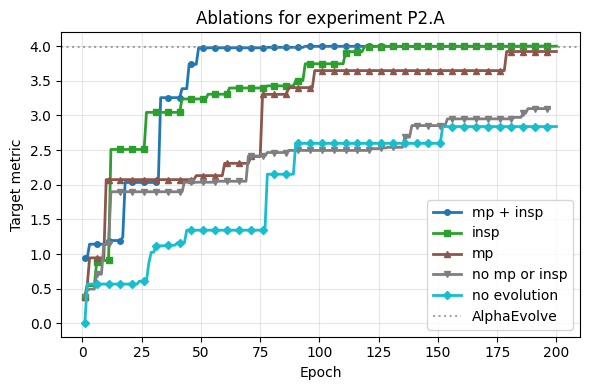

In [7]:
plot_experiments_statistical_summary(
    {
        "mp + insp": experiments_res["gemini_mp_insp_nocontext/"]["res"],
        "insp": experiments_res["gemini_insp/"]["res"],
        "mp": experiments_res["gemini_mp2/"]["res"],
        "no mp or insp": experiments_res["gemini_rank/"]["res"],
        "no evolution": experiments_res["gemini_no_evolve/"]["res"],
    },
    epsilon=1e-4,
    title="Ablations for experiment P2.A",
    save_path="figs/P2A_ablations.pdf",
)

#### P2.B (n = 14, d = 3)

In [8]:
args = args_list[inpt_dir2index["../benchmarks/minimizing_max_min_dist/3/"]]
print(args)

experiments_res = all_exp[args["inpt_dir"]]

{'inpt_dir': '../benchmarks/minimizing_max_min_dist/3/', 'out_dirs': ['gemini_mp_insp/', 'gemini_mp_insp_nocontext/'], 'sol_func_name': 'min_max_dist_dim3_14'}


### P3

#### P3.A (n = 26)

In [9]:
args = args_list[inpt_dir2index["../benchmarks/circle_packing_square/26/"]]
print(args)

experiments_res = all_exp[args["inpt_dir"]]

{'inpt_dir': '../benchmarks/circle_packing_square/26/', 'out_dirs': ['gemini_no_evolve/', 'gemini_no_mp_or_insp/', 'gemini_mp/', 'gemini_insp/', 'gemini_mp_insp/'], 'sol_func_name': 'circle_packing26'}


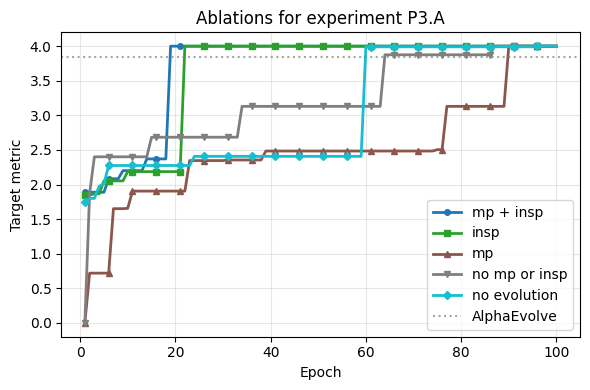

In [10]:
plot_experiments_statistical_summary(
    {
        "mp + insp": experiments_res["gemini_mp_insp/"]["res"],
        "insp": experiments_res["gemini_insp/"]["res"],
        "mp": experiments_res["gemini_mp/"]["res"],
        "no mp or insp": experiments_res["gemini_no_mp_or_insp/"]["res"],
        "no evolution": experiments_res["gemini_no_evolve/"]["res"],
    },
    epsilon=1e-4,
    title="Ablations for experiment P3.A",
    save_path="figs/P3A_ablations.pdf",
)

#### P3.B (n = 32)

In [11]:
args = args_list[inpt_dir2index["../benchmarks/circle_packing_square/32/"]]
print(args)

experiments_res = all_exp[args["inpt_dir"]]

{'inpt_dir': '../benchmarks/circle_packing_square/32/', 'out_dirs': ['gemini_no_evolve/', 'gemini_no_mp_or_insp/', 'gemini_mp/', 'gemini_insp/', 'gemini_mp_insp/'], 'sol_func_name': 'circle_packing32'}


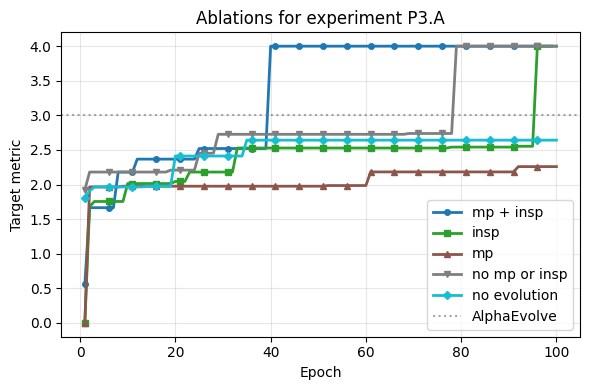

In [12]:
plot_experiments_statistical_summary(
    {
        "mp + insp": experiments_res["gemini_mp_insp/"]["res"],
        "insp": experiments_res["gemini_insp/"]["res"],
        "mp": experiments_res["gemini_mp/"]["res"],
        "no mp or insp": experiments_res["gemini_no_mp_or_insp/"]["res"],
        "no evolution": experiments_res["gemini_no_evolve/"]["res"],
    },
    epsilon=1e-4,
    title="Ablations for experiment P3.A",
    save_path="figs/P3A_ablations.pdf",
)

### P4

In [13]:
args = args_list[inpt_dir2index["../benchmarks/circle_packing_rect/"]]
print(args)

experiments_res = all_exp[args["inpt_dir"]]

{'inpt_dir': '../benchmarks/circle_packing_rect/', 'out_dirs': ['gemini_mp_insp/', 'gemini_mp_insp_nocontext/'], 'sol_func_name': 'circle_packing21'}
